# [作業目標]
- 使用 Day 17 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 17 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = '../../3rd-ML100Days/'

### 之前做過的處理

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [3]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_EMPLOYED_ANOM
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,False
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,False
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,False
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,False
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,False


## 練習時間
參考 Day 17 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [5]:
app_train.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE              int32
CODE_GENDER                    object
FLAG_OWN_CAR                    int32
FLAG_OWN_REALTY                 int32
CNT_CHILDREN                    int64
AMT_INCOME_TOTAL              float64
AMT_CREDIT                    float64
AMT_ANNUITY                   float64
AMT_GOODS_PRICE               float64
NAME_TYPE_SUITE                object
NAME_INCOME_TYPE               object
NAME_EDUCATION_TYPE            object
NAME_FAMILY_STATUS             object
NAME_HOUSING_TYPE              object
REGION_POPULATION_RELATIVE    float64
DAYS_BIRTH                      int64
DAYS_EMPLOYED                 float64
DAYS_REGISTRATION             float64
DAYS_ID_PUBLISH                 int64
OWN_CAR_AGE                   float64
FLAG_MOBIL                      int64
FLAG_EMP_PHONE                  int64
FLAG_WORK_PHONE                 int64
FLAG_CONT_MOBILE                int64
FLAG_PHONE  

###  own car age 

In [6]:
bins = [5,10,15,20,25,30,35,40,45,100]
app_train["OWN_CAR_AGE_grp"] = pd.cut(app_train["OWN_CAR_AGE"],bins=bins)
app_train["OWN_CAR_AGE_grp"].value_counts().sort_values(ascending=False)

(5, 10]      29519
(10, 15]     21158
(15, 20]     12063
(20, 25]      5794
(45, 100]     3375
(25, 30]      2328
(30, 35]       947
(35, 40]       459
(40, 45]       151
Name: OWN_CAR_AGE_grp, dtype: int64

In [7]:
# pivot後 把target 0  和  1 分兩欄，比較好雙折線圖
grouped_df = app_train.groupby(["OWN_CAR_AGE_grp","TARGET"])["AMT_INCOME_TOTAL"].mean().reset_index(name="income_mean")
pivot_df = grouped_df.pivot(index='OWN_CAR_AGE_grp', columns='TARGET', values=['income_mean']).reset_index()
pivot_df

OWN_CAR_AGE_grp    income_mean               
TARGET                              0              1
0              (5, 10]  201555.822685  192680.214172
1             (10, 15]  182221.529299  175096.342241
2             (15, 20]  171617.719441  170346.402639
3             (20, 25]  169076.072425  169949.759358
4             (25, 30]  157010.932592  150949.955607
5             (30, 35]  152335.433255  151935.483871
6             (35, 40]  147778.125000  155327.735294
7             (40, 45]  151492.335766  132171.428571
8            (45, 100]  171956.029583  164385.638298

償還能力困難的族群，除了擁有車齡35-40區間的外，基本上薪資都較另一族群低
薪資差異到在擁有車齡40-45歲落差最大


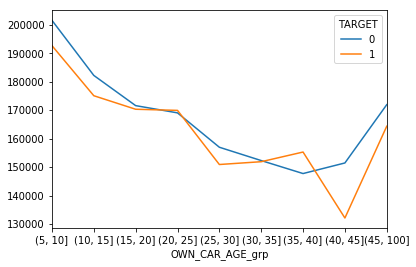

In [8]:
#車齡越高不管0,1薪資都越低
print("償還能力困難的族群，除了擁有車齡35-40區間的外，基本上薪資都較另一族群低")
print("薪資差異到在擁有車齡40-45歲落差最大")
pivot_df.plot.line("OWN_CAR_AGE_grp","income_mean")

###  age

In [11]:
#app_train["DAYS_BIRTH"] = abs(app_train['DAYS_BIRTH'])
app_train["years_BIRTH"] = app_train["DAYS_BIRTH"].apply(lambda x : x/365)
app_train["years_BIRTH"].describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: years_BIRTH, dtype: float64

In [12]:
bins = [20,25,30,35,40,45,50,55,60,100]
app_train["years_BIRTH_grp"] = pd.cut(app_train["years_BIRTH"],bins=bins)
app_train["years_BIRTH_grp"].value_counts().sort_values(ascending=False)

(35, 40]     42868
(40, 45]     41406
(30, 35]     39440
(60, 100]    35579
(45, 50]     35135
(50, 55]     34942
(55, 60]     33120
(25, 30]     32862
(20, 25]     12159
Name: years_BIRTH_grp, dtype: int64

In [13]:
# pivot後 把target 0  和  1 分兩欄，比較好雙折線圖
grouped_df = app_train.groupby(["years_BIRTH_grp","TARGET"])["AMT_INCOME_TOTAL"].mean().reset_index(name="income_mean")
pivot_df = grouped_df.pivot(index='years_BIRTH_grp', columns='TARGET', values=['income_mean']).reset_index()
pivot_df

years_BIRTH_grp    income_mean               
TARGET                              0              1
0             (20, 25]  146275.562262  138746.367313
1             (25, 30]  166172.827179  153531.023348
2             (30, 35]  176554.323121  191555.744760
3             (35, 40]  180749.515948  168089.604748
4             (40, 45]  182545.657497  170929.080000
5             (45, 50]  179893.472122  171979.382003
6             (50, 55]  171485.667105  168832.496154
7             (55, 60]  158839.873119  154659.635371
8            (60, 100]  139040.602830  136132.792119

償還能力困難的族群，除了30-35外，薪資都較低，尤其在40-50中年階段薪資落差更大


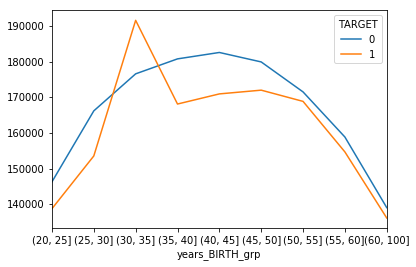

In [15]:

print("償還能力困難的族群，除了30-35外，薪資都較低，尤其在40-50中年階段薪資落差更大")
pivot_df.plot.line("years_BIRTH_grp","income_mean")